# This compares PySulfSat to the spreadsheet of Masotta et al. 2014

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
pd.options.display.max_columns = None

In [2]:
df=pd.read_excel('Masotta_Supplement_Excel.xlsx', 
                sheet_name='PySulfSatFormat')

In [4]:
Mas_Python=ss.calculate_MK2015_SCAS(liq_comps=df, 
                            T_K=df['T(°C)']+273.15)
Mas_Python.head()

,S_melt_ppm,S_melt_wt,C_SO3_melt,SO3_MF,CaO_MF,LnKps,NBOT,Unnamed: 0,Sample,T(°C),P(bar),CaO,Unnamed: 5,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,H2O_Liq,Kps,Unnamed: 16,lnKps,lnKps.1,NBO/T,Unnamed: 20,Unnamed: 21,[S]tot,CaO (Wt),CaO (MF),SO3(MF),C(SO3)melt,S_Melt,X(S)melt,X(S)fluid,X(S)fluid.1,X(S)fluid.2,A1,A2,A3,25,50,100,25.1,50.1,100.1,25.2,50.2,100.2
0,1657.259204,0.165726,0.413818,0.003360,0.005796,-10.846361,0.074372,NaN,Pinatubo 1991,850,2000,0.5,NaN,68.580974,0.471167,17.119068,4.711670,2.209250,0.5,4.659318,1.748553,5,0.000046,NaN,-9.980221,-10.846273,0.074375,NaN,NaN,0.40048,0.5,0.005750,0.003388,0.420609,0.168445,0.294426,0.105152,0.210304,0.420609,0.357143,0.714286,1.428571,0.294426,0.294426,0.294426,0.105152,0.210304,0.420609,0.600422,0.495270,0.284965
1,1181.483878,0.118148,0.295017,0.002393,0.011583,-10.493208,0.086517,NaN,Pinatubo 1991,850,2000,1.0,NaN,68.236346,0.468799,17.033042,4.687993,2.198148,1.0,4.635904,1.739766,5,0.000092,NaN,-9.288661,-10.493122,0.086520,NaN,NaN,0.40048,1.0,0.011490,0.002413,0.299853,0.120085,0.209897,0.074963,0.149927,0.299853,0.357143,0.714286,1.428571,0.209897,0.209897,0.209897,0.074963,0.149927,0.299853,0.715139,0.640176,0.490249
2,1127.094737,0.112709,0.281436,0.002281,0.017361,-10.136470,0.098786,NaN,Pinatubo 1991,850,2000,1.5,NaN,67.891718,0.466432,16.947017,4.664317,2.187046,1.5,4.612491,1.730980,5,0.000138,NaN,-8.884781,-10.136386,0.098788,NaN,NaN,0.40048,1.5,0.017221,0.002300,0.286046,0.114556,0.200232,0.071511,0.143023,0.286046,0.357143,0.714286,1.428571,0.200232,0.200232,0.200232,0.071511,0.143023,0.286046,0.728257,0.656745,0.513723
3,1214.020235,0.121402,0.303141,0.002455,0.023130,-9.776091,0.111179,NaN,Pinatubo 1991,850,2000,2.0,NaN,67.547090,0.464064,16.860991,4.640640,2.175944,2.0,4.589077,1.722193,5,0.000184,NaN,-8.598684,-9.776009,0.111182,NaN,NaN,0.40048,2.0,0.022944,0.002476,0.308102,0.123389,0.215671,0.077025,0.154051,0.308102,0.357143,0.714286,1.428571,0.215671,0.215671,0.215671,0.077025,0.154051,0.308102,0.707303,0.630278,0.476227
4,1399.989681,0.139999,0.349578,0.002829,0.028889,-9.412016,0.123700,NaN,Pinatubo 1991,850,2000,2.5,NaN,67.202462,0.461696,16.774966,4.616963,2.164843,2.5,4.565663,1.713406,5,0.000230,NaN,-8.377124,-9.411936,0.123703,NaN,NaN,0.40048,2.5,0.028657,0.002852,0.355293,0.142288,0.248705,0.088823,0.177646,0.355293,0.357143,0.714286,1.428571,0.248705,0.248705,0.248705,0.088823,0.177646,0.355293,0.662472,0.573649,0.396002


## Testing how it does vs. their spreadsheet
- There will be a slight discrepency, this is because Masotta use SO3 as part of the calculation of cation fractions, even though this parameter is what is being solved for

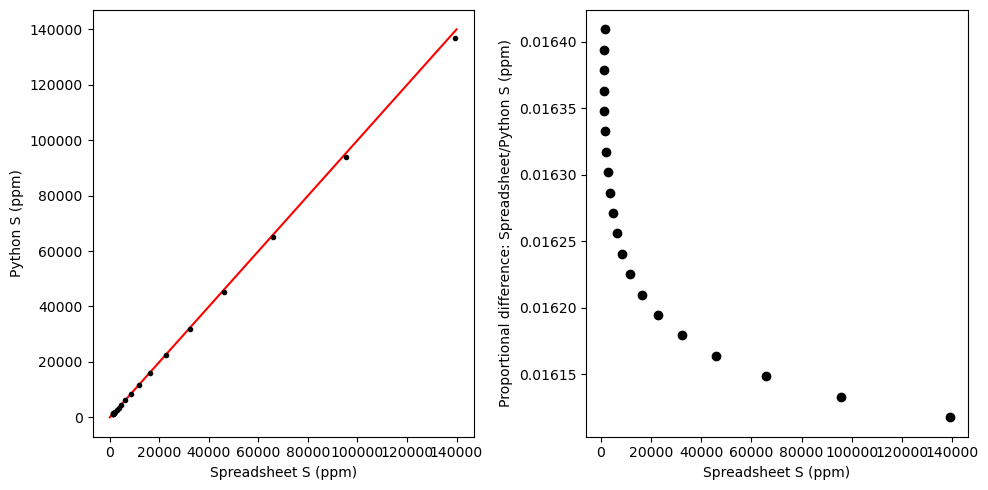

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([0, 140000], [0, 140000], '-r')
ax1.plot(10000*df['S_Melt'], Mas_Python['S_melt_ppm'], '.k')
ax1.set_xlabel('Spreadsheet S (ppm)')
ax1.set_ylabel('Python S (ppm)')
ax2.plot(10000*df['S_Melt'],
        (10000*df['S_Melt']-Mas_Python['S_melt_ppm'])/Mas_Python['S_melt_ppm'], 'ok')
ax2.ticklabel_format(useOffset=False)
ax2.set_xlabel('Spreadsheet S (ppm)')
ax2.set_ylabel('Proportional difference: Spreadsheet/Python S (ppm)')
fig.tight_layout()